In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt


import insightface
from insightface.app import FaceAnalysis

In [2]:
print("insightface", insightface.__version__)


insightface 0.7.3


In [3]:
app = FaceAnalysis(name = 'buffalo_l')
app.prepare(ctx_id=0,det_size=(640,640))

/home/f4th3r/Projects/reFace/venv/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/f4th3r/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/f4th3r/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/f4th3r/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/f4th3r/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/f4th3r/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
se

In [27]:
# img = ins_get_image('t1')
# plt.imshow(img[:,:,::-1])
# plt.show()

In [4]:
path_model = '/home/f4th3r/Projects/reFace/inswapper_128.onnx'

swapper =insightface.model_zoo.get_model(path_model,
                                         download=False,
                                         download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [29]:
# faces = app.get(img)
# source_face = faces[0]
# bbox = source_face['bbox']
# bbox = [int(b) for b in bbox]
# plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
# plt.show()

In [30]:
# res = img.copy()
# for face in faces:
#     res = swapper.get(res,face,source_face,paste_back=True)

In [31]:
# plt.imshow(res[:,:,::-1])
# plt.show()

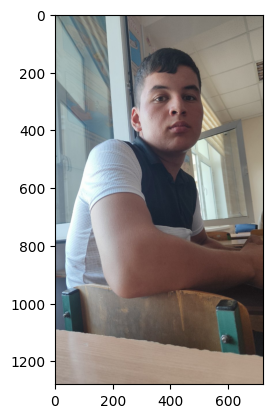

In [12]:
path_face = '/home/f4th3r/Projects/reFace/image.png'
rob = cv2.imread(path_face)
plt.imshow(rob[:,:,::-1])
plt.show()

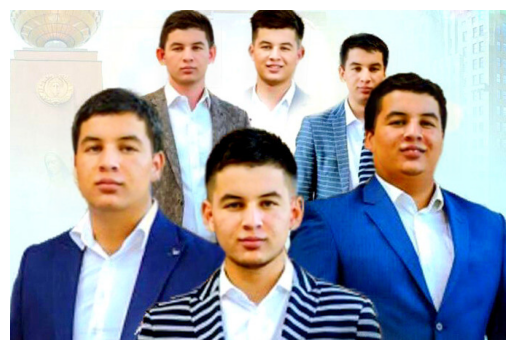

In [13]:
path_img = "/home/f4th3r/Projects/reFace/wwww.jpeg"

rob_faces = app.get(rob)
rob_face = rob_faces[0]

full_img =cv2.imread(path_img)


faces = app.get(full_img)
res = full_img.copy()

for face in faces:
    res = swapper.get(res,face,rob_face,paste_back=True)

fig , ax =plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()